# Content of this notebook
1.Inspecting small, emotion-labeled database(686_df)\
2.Create NeuroNetwork model on 686_df\
3.Clean up and labeling big database (Kaggle_df)\
4.Generate a playlist from Kaggle_df

## 1.Loading the small-database

In [10]:
import pandas as pd

df_686 = pd.read_csv('../raw_data/mood+music686.csv')
df_686.head()


,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [11]:
df_686['mood'].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [12]:
#Drop 'release_data' from 686 database. (If time for tailoring, this feature can be important)
df_686 = df_686.drop(columns={'release_date'})

## 2.Train NeuroNetwork on df_686

In [13]:
#Target encoding
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse_output=False)
oh_encoder.fit(df_686[['mood']])
df_686[oh_encoder.get_feature_names_out()] = oh_encoder.transform(df_686[['mood']])
df_686.drop(columns=['mood'],inplace=True)
df_686.head()

,name,album,artist,id,popularity,length,danceability,acousticness,energy,instrumentalness,...,valence,loudness,speechiness,tempo,key,time_signature,mood_Calm,mood_Energetic,mood_Happy,mood_Sad
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,68,379266,0.866,0.13700,0.730,0.000000,...,0.625,-8.201,0.0767,118.523,5,4,0.0,0.0,1.0,0.0
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,43,318800,0.381,0.01890,0.832,0.196000,...,0.166,-5.069,0.0492,120.255,8,4,0.0,0.0,0.0,1.0
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,60,217946,0.346,0.91300,0.139,0.000077,...,0.116,-15.326,0.0321,136.168,0,4,0.0,0.0,0.0,1.0
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,2,233000,0.466,0.08900,0.438,0.000006,...,0.587,-12.858,0.0608,193.100,4,4,0.0,0.0,1.0,0.0
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,60,268000,0.419,0.00171,0.932,0.000000,...,0.445,-3.604,0.1060,169.881,1,4,0.0,1.0,0.0,0.0


In [14]:
#Split the dataframe
y = df_686[['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad']]
X = df_686[['length', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',
       'loudness', 'speechiness', 'tempo', 'key', 'time_signature']]

#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

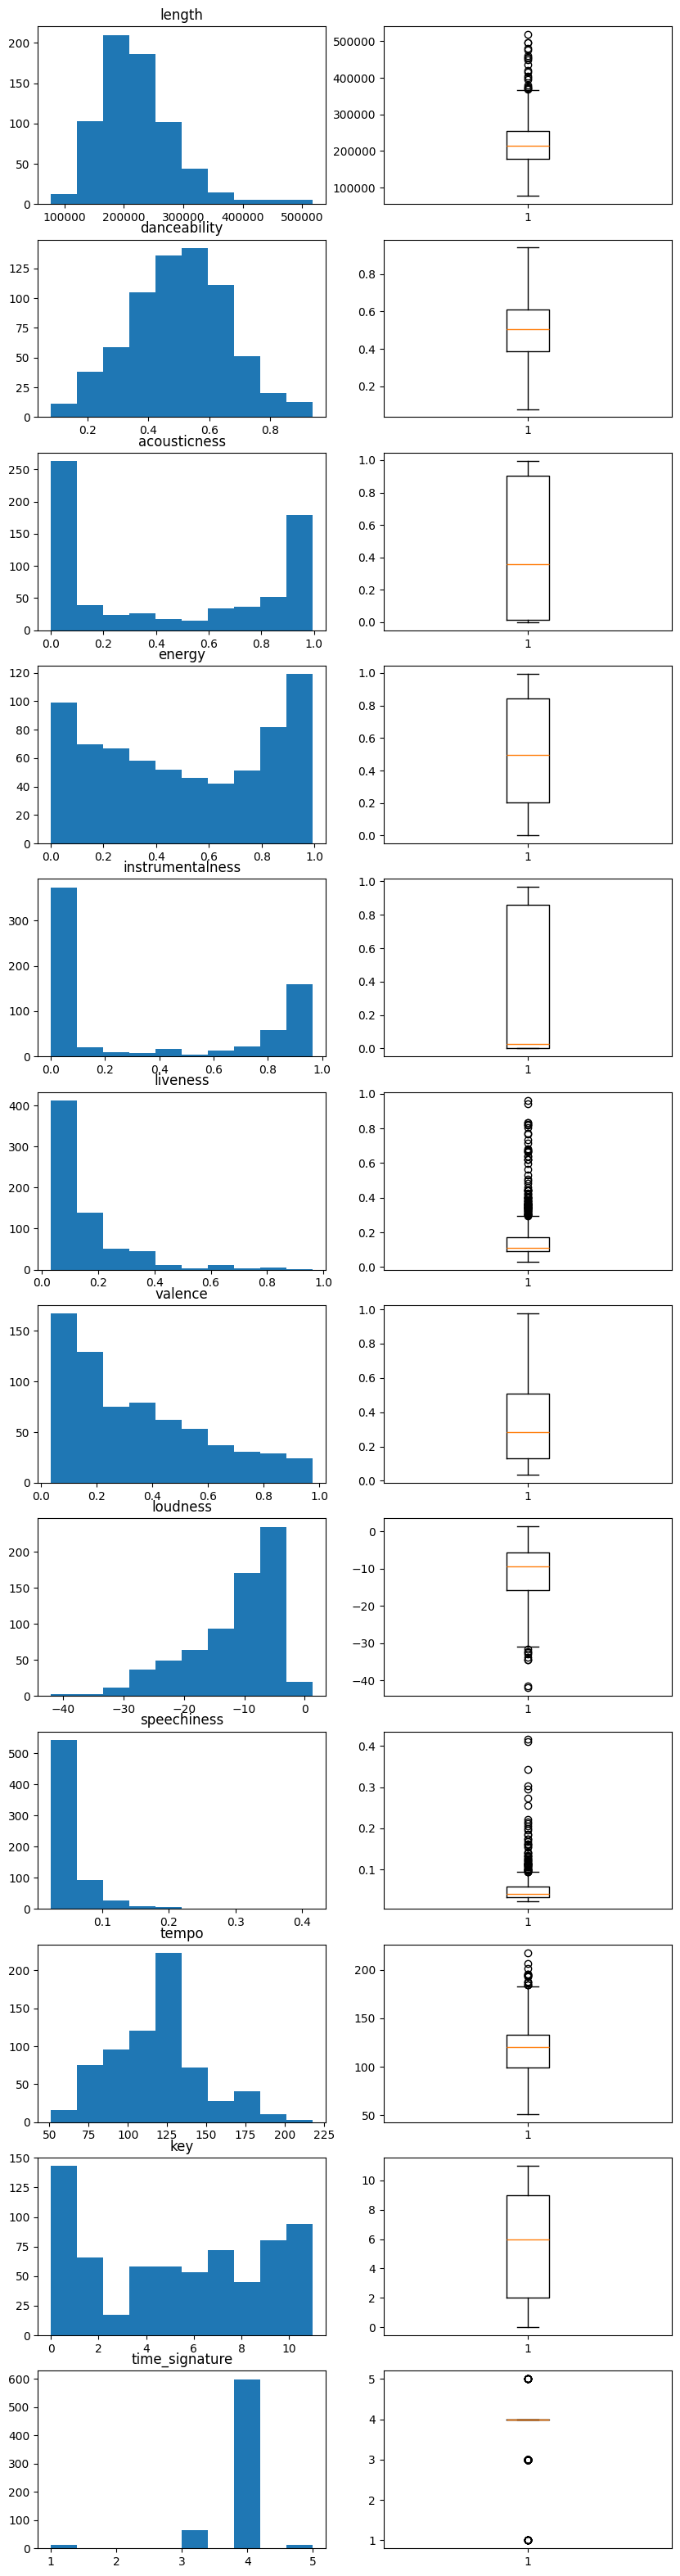

In [15]:
#Check the histogram of each features
import matplotlib.pyplot as plt

fig, axs = plt.subplots(12, 2, figsize=(10,40))

for i in range(12):
    axs[i,0].hist(X[X.keys().to_list()[i]])
    axs[i,1].boxplot(X[X.keys().to_list()[i]])
    axs[i,0].set_title(f'{X.keys().to_list()[i]}')
plt.show()

In [7]:
# #Standard scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [16]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#Deep Learning
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(20,activation='relu',input_dim=12))
model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))

model.add(keras.layers.Dense(4,activation='softmax'))

model.summary()

2024-02-20 16:13:23.823187: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 16:13:24.793392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 16:13:24.793563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 16:13:24.856033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 16:13:25.079956: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 16:13:25.086851: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 514 (2.01 KB)
Trainable params: 514 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
es = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train_scaled,y_train,
                    validation_split=0.3,
                    batch_size=16,
                    epochs=200,
                    callbacks=[es])

Epoch 1/200
21/21 [==============================] - 2s 21ms/step - loss: 1.4807 - accuracy: 0.2440 - val_loss: 1.3430 - val_accuracy: 0.3403
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 1.3979 - accuracy: 0.2768 - val_loss: 1.3070 - val_accuracy: 0.3958
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 1.3589 - accuracy: 0.2917 - val_loss: 1.2712 - val_accuracy: 0.4444
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 1.3087 - accuracy: 0.3571 - val_loss: 1.2311 - val_accuracy: 0.4583
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 1.2578 - accuracy: 0.4137 - val_loss: 1.1849 - val_accuracy: 0.5139
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 1.1687 - accuracy: 0.4940 - val_loss: 1.1356 - val_accuracy: 0.5694
Epoch 7/200
21/21 [==============================] - 0s 9ms/step - loss: 1.1328 - accuracy: 0.5268 - val_loss: 1.0860 - val_accuracy: 0.5694
Epoch 8/200


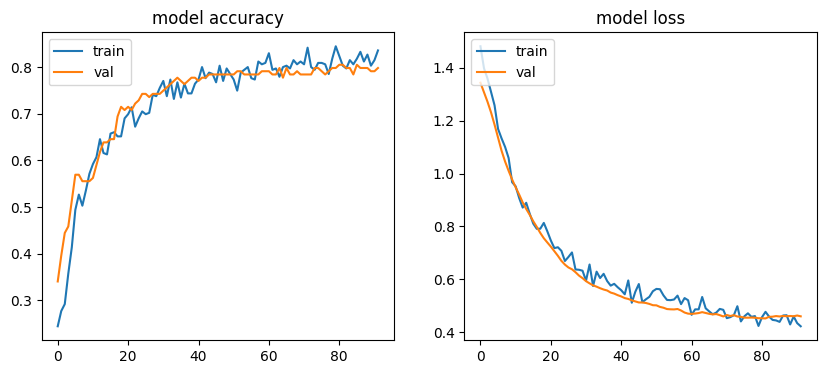

In [20]:
#Plot the history
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].legend(['train', 'val'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].legend(['train', 'val'], loc='upper left')

plt.show()

In [21]:
result = model.evaluate(X_test_scaled,y_test)
result

7/7 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7524


[0.5712873935699463, 0.7524271607398987]

## 3.Clean up and Scale Kaggle_df, and label it using our model

### Clean up Kaggle_df

In [12]:
kaggle_df = pd.read_csv('../raw_data/spotify_dataset.csv')
kaggle_df = kaggle_df.rename(columns={'track_id':'id','artists':'artist','album_name':'album',
                          'track_name':'name','duration_ms':'length'})

#Drop unnecessary columns (These columns are not included in 686_df)
kaggle_df = kaggle_df.drop(columns={'explicit','mode','Unnamed: 0'})

#Reorder the columns in kaggle database to match 686_df columns
kaggle_df = kaggle_df[df_686.columns.to_list()[:-4]+['track_genre']]

#Drop duplicated rows from kaggle_df
kaggle_df = kaggle_df.drop_duplicates(subset='name')
kaggle_df.head()

,name,album,artist,id,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,track_genre
0,Comedy,Comedy,Gen Hoshino,5SuOikwiRyPMVoIQDJUgSV,73,230666,0.676,0.0322,0.4610,0.000001,0.3580,0.715,-6.746,0.1430,87.917,1,4,acoustic
1,Ghost - Acoustic,Ghost (Acoustic),Ben Woodward,4qPNDBW1i3p13qLCt0Ki3A,55,149610,0.420,0.9240,0.1660,0.000006,0.1010,0.267,-17.235,0.0763,77.489,1,4,acoustic
2,To Begin Again,To Begin Again,Ingrid Michaelson;ZAYN,1iJBSr7s7jYXzM8EGcbK5b,57,210826,0.438,0.2100,0.3590,0.000000,0.1170,0.120,-9.734,0.0557,76.332,0,4,acoustic
3,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,Kina Grannis,6lfxq3CG4xtTiEg7opyCyx,71,201933,0.266,0.9050,0.0596,0.000071,0.1320,0.143,-18.515,0.0363,181.740,0,3,acoustic
4,Hold On,Hold On,Chord Overstreet,5vjLSffimiIP26QG5WcN2K,82,198853,0.618,0.4690,0.4430,0.000000,0.0829,0.167,-9.681,0.0526,119.949,2,4,acoustic


### Drop songs that don't match our goal

In [13]:
#Speechness selection: drop radioshows, liveshows and back ground musics
kaggle_df = kaggle_df[(kaggle_df['speechiness']>0.33) & (kaggle_df['speechiness']<0.50)]
kaggle_df = kaggle_df[kaggle_df['liveness']<0.8]

#Instrumentalness selection: drop bgms.
kaggle_df = kaggle_df[kaggle_df['instrumentalness']<0.9]

### Scale Kaggle_df

In [14]:
kaggle_df_scaled = scaler.transform(kaggle_df[['length', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',
       'loudness', 'speechiness', 'tempo', 'key', 'time_signature']])

### Label with mood using our model

In [15]:
kaggle_mood = model.predict(kaggle_df_scaled)
kaggle_df[['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad']] = kaggle_mood
kaggle_df.head(5)

54/54 [==============================] - 1s 5ms/step


,name,album,artist,id,popularity,length,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,tempo,key,time_signature,track_genre,mood_Calm,mood_Energetic,mood_Happy,mood_Sad
768,Memories (Acoustic),Memories (Acoustic),Ben Woodward,1m3Lsbhkn6yL8apzsCiukd,46,183337,0.802,0.809,0.183,0.0,...,-17.100,0.403,91.078,8,4,acoustic,0.000287,0.003602,0.078374,0.917737
1001,Ainda Há Tempo,Ainda Há Tempo,Criolo,4Ds4bq6aqOSAp1T7DikOi4,44,318360,0.580,0.281,0.800,0.0,...,-7.528,0.345,81.303,6,4,afrobeat,0.000438,0.205746,0.394569,0.399247
1012,Breaco,Ainda Há Tempo,Criolo,0J4hFHpfCAlJOdrtcm04vz,40,177240,0.619,0.148,0.781,0.0,...,-6.548,0.333,182.026,1,4,afrobeat,0.000007,0.429782,0.534752,0.035460
1014,É o Teste,Ainda Há Tempo,Criolo,7cAxwshLN1yidrBlDePrYW,41,279720,0.660,0.178,0.728,0.0,...,-6.177,0.337,91.101,10,4,afrobeat,0.000144,0.239061,0.489263,0.271532
1091,Grajauex - Live,Criolo E Emicida Ao Vivo (Live),Criolo;Emicida,0UZ3juSCFsN6lINBadUZNZ,33,191453,0.358,0.304,0.905,0.0,...,-5.776,0.453,176.670,5,4,afrobeat,0.000039,0.799761,0.151770,0.048430


In [16]:
#Make a simpler dataframe
kaggle_df_simple = kaggle_df[['name', 'album', 'artist', 'id', 'popularity', 'track_genre',
       'mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad']]
kaggle_df_simple.head()

,name,album,artist,id,popularity,track_genre,mood_Calm,mood_Energetic,mood_Happy,mood_Sad
768,Memories (Acoustic),Memories (Acoustic),Ben Woodward,1m3Lsbhkn6yL8apzsCiukd,46,acoustic,0.000287,0.003602,0.078374,0.917737
1001,Ainda Há Tempo,Ainda Há Tempo,Criolo,4Ds4bq6aqOSAp1T7DikOi4,44,afrobeat,0.000438,0.205746,0.394569,0.399247
1012,Breaco,Ainda Há Tempo,Criolo,0J4hFHpfCAlJOdrtcm04vz,40,afrobeat,0.000007,0.429782,0.534752,0.035460
1014,É o Teste,Ainda Há Tempo,Criolo,7cAxwshLN1yidrBlDePrYW,41,afrobeat,0.000144,0.239061,0.489263,0.271532
1091,Grajauex - Live,Criolo E Emicida Ao Vivo (Live),Criolo;Emicida,0UZ3juSCFsN6lINBadUZNZ,33,afrobeat,0.000039,0.799761,0.151770,0.048430


All the genres in kaggle_df:\
 'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll', 'rock',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'soul',
       'spanish', 'study', 'swedish', 'synth-pop', 'tango', 'techno',
       'trance', 'trip-hop', 'turkish', 'world-music'

In [17]:
#Just for experiment, exclude several genres:
genres_to_exclude = {'grunge', 'guitar','gospel','anime','children','brazil','german','kids','malay','opera','mandopop','iranian','comedy','cantopop'
    'pagode','piano','salsa','samba','sertanejo','sleep','tango','turkish', 'world-music','folk','classical','indian','study','forro','j-idol','pop-film'}

kaggle_df_simple = kaggle_df_simple[~kaggle_df_simple['track_genre'].isin(genres_to_exclude)]

## 4.Generate Playlist function

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import os

########VARIABLES######
SPOTIFY_CLIENT_ID = os.environ.get("SPOTIFY_CLIENT_ID")
SPOTIFY_SECRET = os.environ.get("SPOTIFY_SECRET")
SPOTIFY_USERNAME = os.environ.get("SPOTIFY_USERNAME")
REDIRECT_URI = os.environ.get("REDIRECT_URI")

def generate_playlist(df,emotion):
    '''This function will access Spotify API and add playlist to your account.
    The songs will be chosen from the provided df.'''

    sp = spotipy.Spotify(
        auth_manager=SpotifyOAuth(
            scope="playlist-modify-public",
            redirect_uri=REDIRECT_URI,
            client_id=SPOTIFY_CLIENT_ID,
            client_secret=SPOTIFY_SECRET,
            show_dialog=True,
            cache_path="token.txt",
            username=SPOTIFY_USERNAME,
        )
    )

    user_id = sp.current_user()["id"]

    new_playlist = sp.user_playlist_create(user=user_id, name=f"{emotion} playlist for you!", public=True,
                                      description=None)
    new_playlist_id = new_playlist["id"]

    # Select some music from df.

    title_list_sample = list(df.head(10)['name'])



    uri_list = []
    for value in range(10):
        spotify_result = sp.search(q=f"track:{title_list_sample[value]}",type="track", market="US")
        try:
            result_uri = spotify_result["tracks"]["items"][0]["uri"]
        except IndexError:
            pass
        else:
            uri_list.append(result_uri)

    sp.user_playlist_add_tracks(user=user_id, playlist_id=new_playlist_id, tracks=uri_list)

In [ ]:
#This function is added later;
#Taking into account that the mixture of four emotions is passed from facial recognition module.
# emotion = {'Happy':0.4,'Sad':0.2,''}

# def tailor_df_new(emotion):


In [23]:
def tailor_df(emotion:str):
    '''This function takes emotion input from facial recognition
    and outputs a dataframe tailored for that emotion'''
    if emotion == 'anger' or 'disgust' or 'fear':
        mood_df = kaggle_df_simple.sort_values('mood_Calm',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Energetic',ascending=True).head(100).sample(10)

    elif emotion == 'enthusiasm':
        mood_df = kaggle_df_simple.sort_values('mood_Energetic',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Calm',ascending=True).head(100).sample(10)

    elif emotion == 'happiness' or 'neutral':
        mood_df = kaggle_df_simple.sort_values('mood_Happy',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Sad',ascending=True).head(100).sample(10)

    else:
        mood_df = kaggle_df_simple.sort_values('mood_Sad',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Happy',ascending=True).head(100).sample(10)

    return mood_df

In [20]:
#Generate playlist.
current_emotion = 'Energetic'

generate_playlist(df=tailor_df(current_emotion),emotion=current_emotion)


## Explore other dataset: top 10000 tracks on Spotify since 1960.

In [34]:
import pandas as pd
new_df = pd.read_csv('../raw_data/top_10000_1960-now.csv')

In [35]:
#Clean up dataframe
new_df = new_df.drop(columns={'Artist URI(s)','Album URI', 'Album Artist URI(s)','Album Artist Name(s)',
                      'Album Image URL','Disc Number', 'Track Number',
                      'Track Preview URL', 'Explicit', 'ISRC', 'Added By','Added At',
                      'Album Genres','Label', 'Copyrights','Mode'})
new_df = new_df.drop_duplicates()
new_df = new_df[new_df['Danceability'].isna()==False]
new_df = new_df[new_df['Track Name'].isna()==False]

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9948 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Track URI            9948 non-null   object 
 1   Track Name           9948 non-null   object 
 2   Artist Name(s)       9948 non-null   object 
 3   Album Name           9948 non-null   object 
 4   Album Release Date   9948 non-null   object 
 5   Track Duration (ms)  9948 non-null   int64  
 6   Popularity           9948 non-null   int64  
 7   Artist Genres        9402 non-null   object 
 8   Danceability         9948 non-null   float64
 9   Energy               9948 non-null   float64
 10  Key                  9948 non-null   float64
 11  Loudness             9948 non-null   float64
 12  Speechiness          9948 non-null   float64
 13  Acousticness         9948 non-null   float64
 14  Instrumentalness     9948 non-null   float64
 15  Liveness             9948 non-null   float6

In [37]:
df_686 = pd.read_csv('../raw_data/mood+music686.csv')
df_686.keys()

Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')

In [38]:
new_df.shape

(9948, 19)

In [39]:
df_686.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [40]:
new_df = new_df.rename(columns={'Track Name':'name','Album Name':'album','Artist Name(s)':'artist','Track URI':'id','Album Release Date':'release_date'
                                ,'Popularity':'popularity','Track Duration (ms)':'length','Danceability':'danceability','Acousticness':'acousticness',
                                'Energy':'energy','Instrumentalness':'instrumentalness','Liveness':'liveness','Valence':'valence',
    'Tempo':'tempo','Key':'key','Time Signature':'time_signature','Loudness':'loudness','Speechiness':'speechiness','Artist Genres':'track_genre'})
new_df.head()

,id,name,artist,album,release_date,length,popularity,track_genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,216270,0,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,237120,64,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,312533,56,"dance pop,pop",0.677,0.665,7.0,-5.171,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,233400,42,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,448720,0,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0


In [41]:
new_df.shape

#The difference in columns: df_686 has 'mood', new_df has 'Artist Genres'

(9948, 19)

In [42]:
#Drop unnecessary features
new_df = new_df[new_df['length']<400000]
new_df = new_df[new_df['liveness']<0.3]
new_df = new_df[new_df['loudness']>-30]
new_df = new_df[new_df['speechiness']>0.1]

In [43]:
#Scale the dataframe
new_df_scaled = scaler.transform(new_df[['length', 'danceability',
    'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',
    'loudness', 'speechiness', 'tempo', 'key', 'time_signature']])

new_df_mood = model.predict(new_df_scaled)
new_df[['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad']] = new_df_mood

print(new_df.shape)

33/33 [==============================] - 0s 3ms/step
(1040, 23)


In [44]:
def tailor_df(emotion:str):
    '''This function takes emotion input from facial recognition
    and outputs a dataframe tailored for that emotion'''
    if emotion == 'anger' or 'disgust' or 'fear':
        mood_df = new_df.sort_values('mood_Calm',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Energetic',ascending=True).head(100).sample(10)

    elif emotion == 'enthusiasm':
        mood_df = new_df.sort_values('mood_Energetic',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Calm',ascending=True).head(100).sample(10)

    elif emotion == 'happiness' or 'neutral':
        mood_df = new_df.sort_values('mood_Happy',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Sad',ascending=True).head(100).sample(10)

    else:
        mood_df = new_df.sort_values('mood_Sad',ascending=False).head(200)
        mood_df = mood_df.sort_values('mood_Happy',ascending=True).head(100).sample(10)

    return mood_df

In [48]:
generate_playlist(df=tailor_df("Sad"),emotion='Sad')